https://drive.google.com/file/d/1dGcQxsV-2sz9dgqBriWSDZONNirHEHZ7/view

In [17]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from Funciones import Explorer

In [18]:
DATA_DIR="/Users/anestrada/Documents/Estudio/Purchase-Card-Transactions_GLBNT_TESTT/Purchase-Card-Transactions_GLBNT_TESTT/Data/"

In [19]:
expl = Explorer()
df_f = expl.clean_import(DATA_DIR)
print("La dimension de la base es: ", df_f.shape)
df_f.head()

La dimension de la base es:  (47803, 12)


,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,BILLING CUR CODE,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,Unnamed: 10
0,3.0,30.00,4008.0,610.0,0.0,32.0,96.0,761.0,30.0,0.0,0.0,10.0
1,3.0,55.11,4008.0,610.0,0.0,32.0,96.0,761.0,30.0,0.0,0.0,10.0
2,3.0,42.00,4350.0,861.0,0.0,32.0,96.0,764.0,492.0,0.0,0.0,10.0
3,3.0,62.21,1302.0,285.0,0.0,32.0,96.0,775.0,276.0,0.0,0.0,10.0
4,3.0,71.42,1302.0,285.0,0.0,32.0,96.0,775.0,276.0,0.0,0.0,10.0


## 1. Normalizo mi base de datos

In [20]:
scaler = StandardScaler()

scaler.fit(df_f)
scaled_data = scaler.transform(df_f)

In [21]:
normal_total_data = pd.DataFrame(data=scaled_data, columns=df_f.columns)
normal_total_data.head()

,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,BILLING CUR CODE,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,Unnamed: 10
0,-1.013702,-0.065542,0.897552,0.188897,-0.62203,-0.916245,1.330272,1.489379,-1.651448,-0.118406,-2.169043,0.26584
1,-1.013702,-0.052717,0.897552,0.188897,-0.62203,-0.916245,1.330272,1.489379,-1.651448,-0.118406,-2.169043,0.26584
2,-1.013702,-0.059413,1.077026,1.012574,-0.62203,-0.916245,1.330272,1.501366,0.097408,-0.118406,-2.169043,0.26584
3,-1.013702,-0.049091,-0.522496,-0.877617,-0.62203,-0.916245,1.330272,1.545319,-0.720239,-0.118406,-2.169043,0.26584
4,-1.013702,-0.044388,-0.522496,-0.877617,-0.62203,-0.916245,1.330272,1.545319,-0.720239,-0.118406,-2.169043,0.26584


In [22]:
from numpy.linalg import eig

w, v = eig(np.cov(scaled_data.T))
w

array([1.79211713, 1.73663617, 0.44598551, 0.62713689, 0.67532745,
       0.70127296, 1.16771541, 0.83713181, 1.04350614, 0.96608164,
       0.99478723, 1.0125527 ])

In [23]:
ev = w
eV = v

In [24]:
random_eigen_values = []
eigen_values = []

for i in range(1):
    random.shuffle(scaled_data)
    w, v = eig(np.cov(scaled_data.T))
    random_eigen_values.extend(w.astype(float))
    eigen_values.extend(ev)    

### Nota: Pendiente de rectificar la logica de este remuestreo

In [25]:
w

array([1.85646938, 1.39177765, 0.36281388, 0.59042973, 0.61082513,
       0.66510482, 1.13810821, 0.82847866, 0.87596269, 1.0517362 ,
       0.97281199, 1.01308056])

In [26]:
conf_level = 0.95

In [27]:
#Nivel de confianza estadistico de los valores propios
np.percentile(random_eigen_values, conf_level)

0.38659973898366623

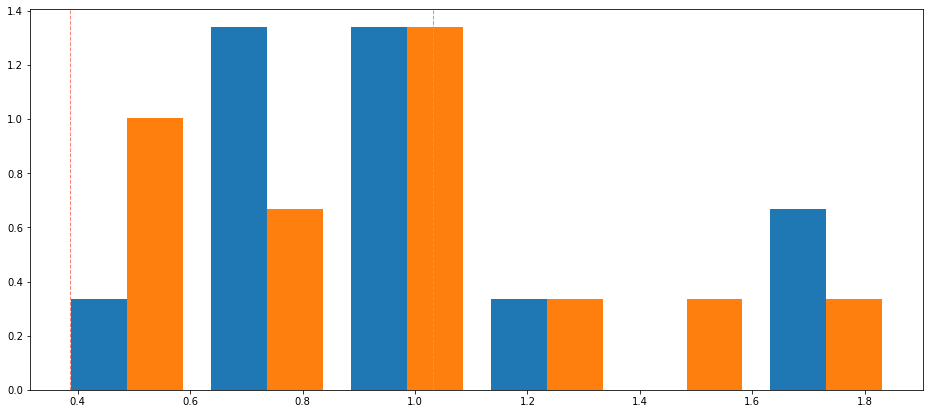

In [28]:
N, M = normal_total_data.values.shape
MP_th = (1+ np.sqrt(M/N))**2

plt.figure(figsize=(16,7))
result = plt.hist([eigen_values, random_eigen_values], bins="auto", density=True)
plt.axvline(np.percentile(random_eigen_values, conf_level), color="salmon", linestyle="dashed", linewidth=1)
plt.axvline(MP_th, color="springgreen", linestyle="dashed", linewidth=1)

In [40]:
base = eV.T[ev > MP_th] # np.percentile(random_eigen_values, conf_level)
filtered_norm_df = np.dot(np.dot(normal_total_data.values, base.T),base)
filtered_norm_df = pd.DataFrame(data=filtered_norm_df, columns=df_f.columns, index= df_f.index)

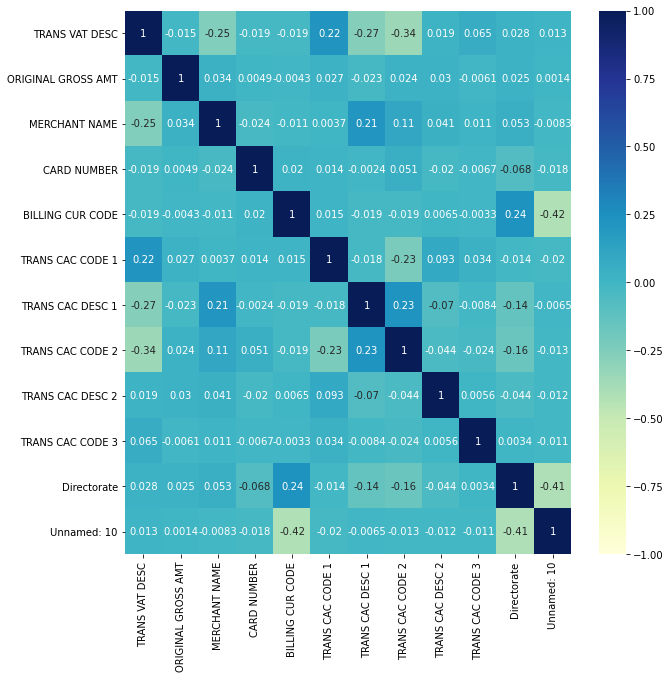

In [41]:
# Correlograma original

plt.figure(figsize=(10,10))
sns.heatmap(normal_total_data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

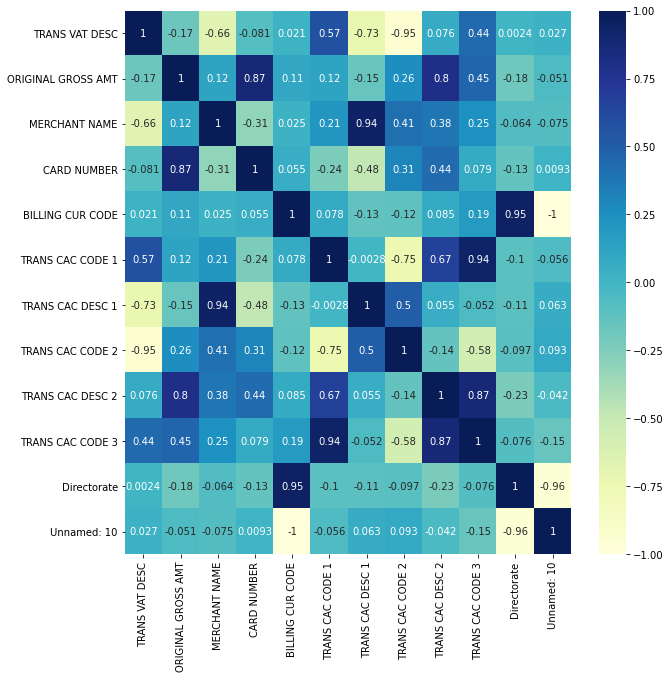

In [42]:
# Correlograma Filtrado
plt.figure(figsize=(10,10))
sns.heatmap(filtered_norm_df.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

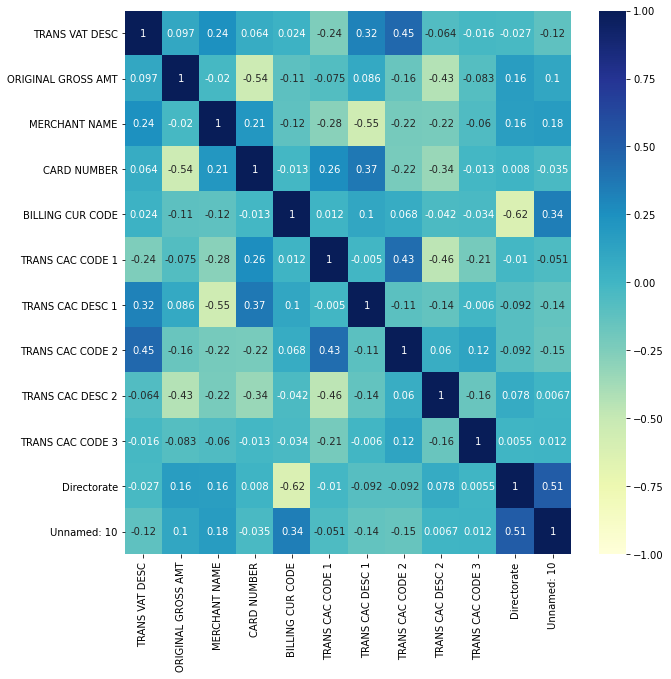

In [43]:
# Correlograma de la matriz de error
error_data = normal_total_data - filtered_norm_df

plt.figure(figsize=(10,10))
sns.heatmap(error_data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

### Falta:
1. Poner todos los comentarios al respecto
2. La proyeccion de una serie de tiempo o base de datos sintetica

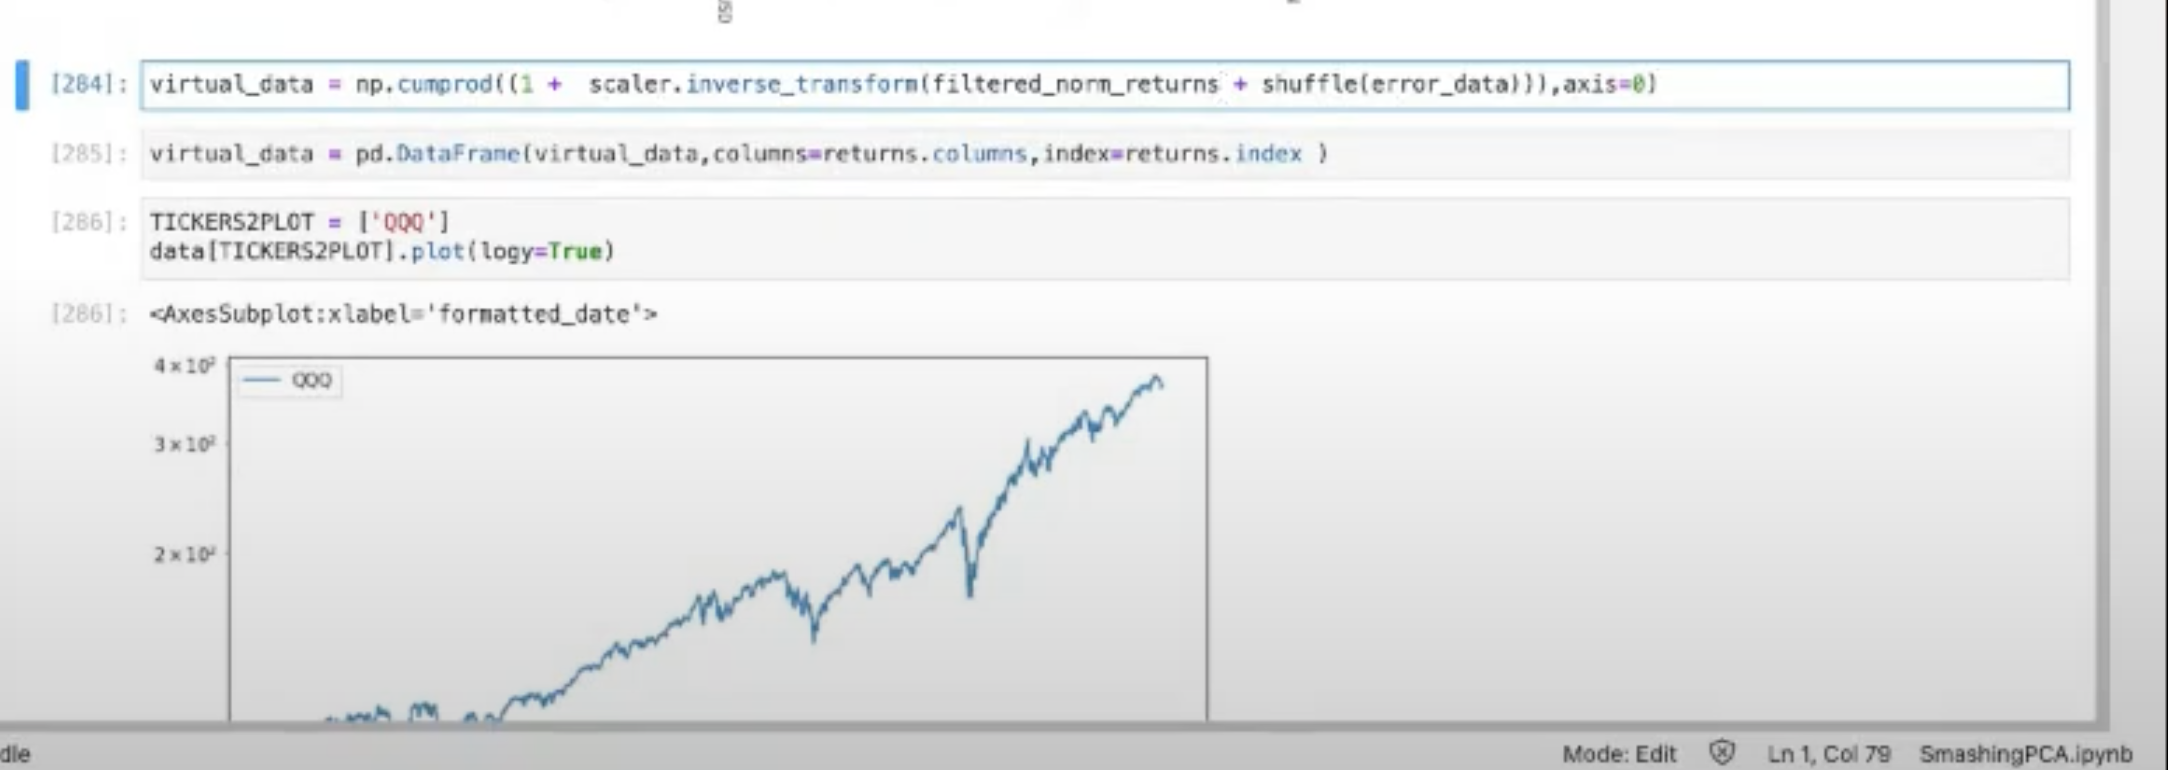

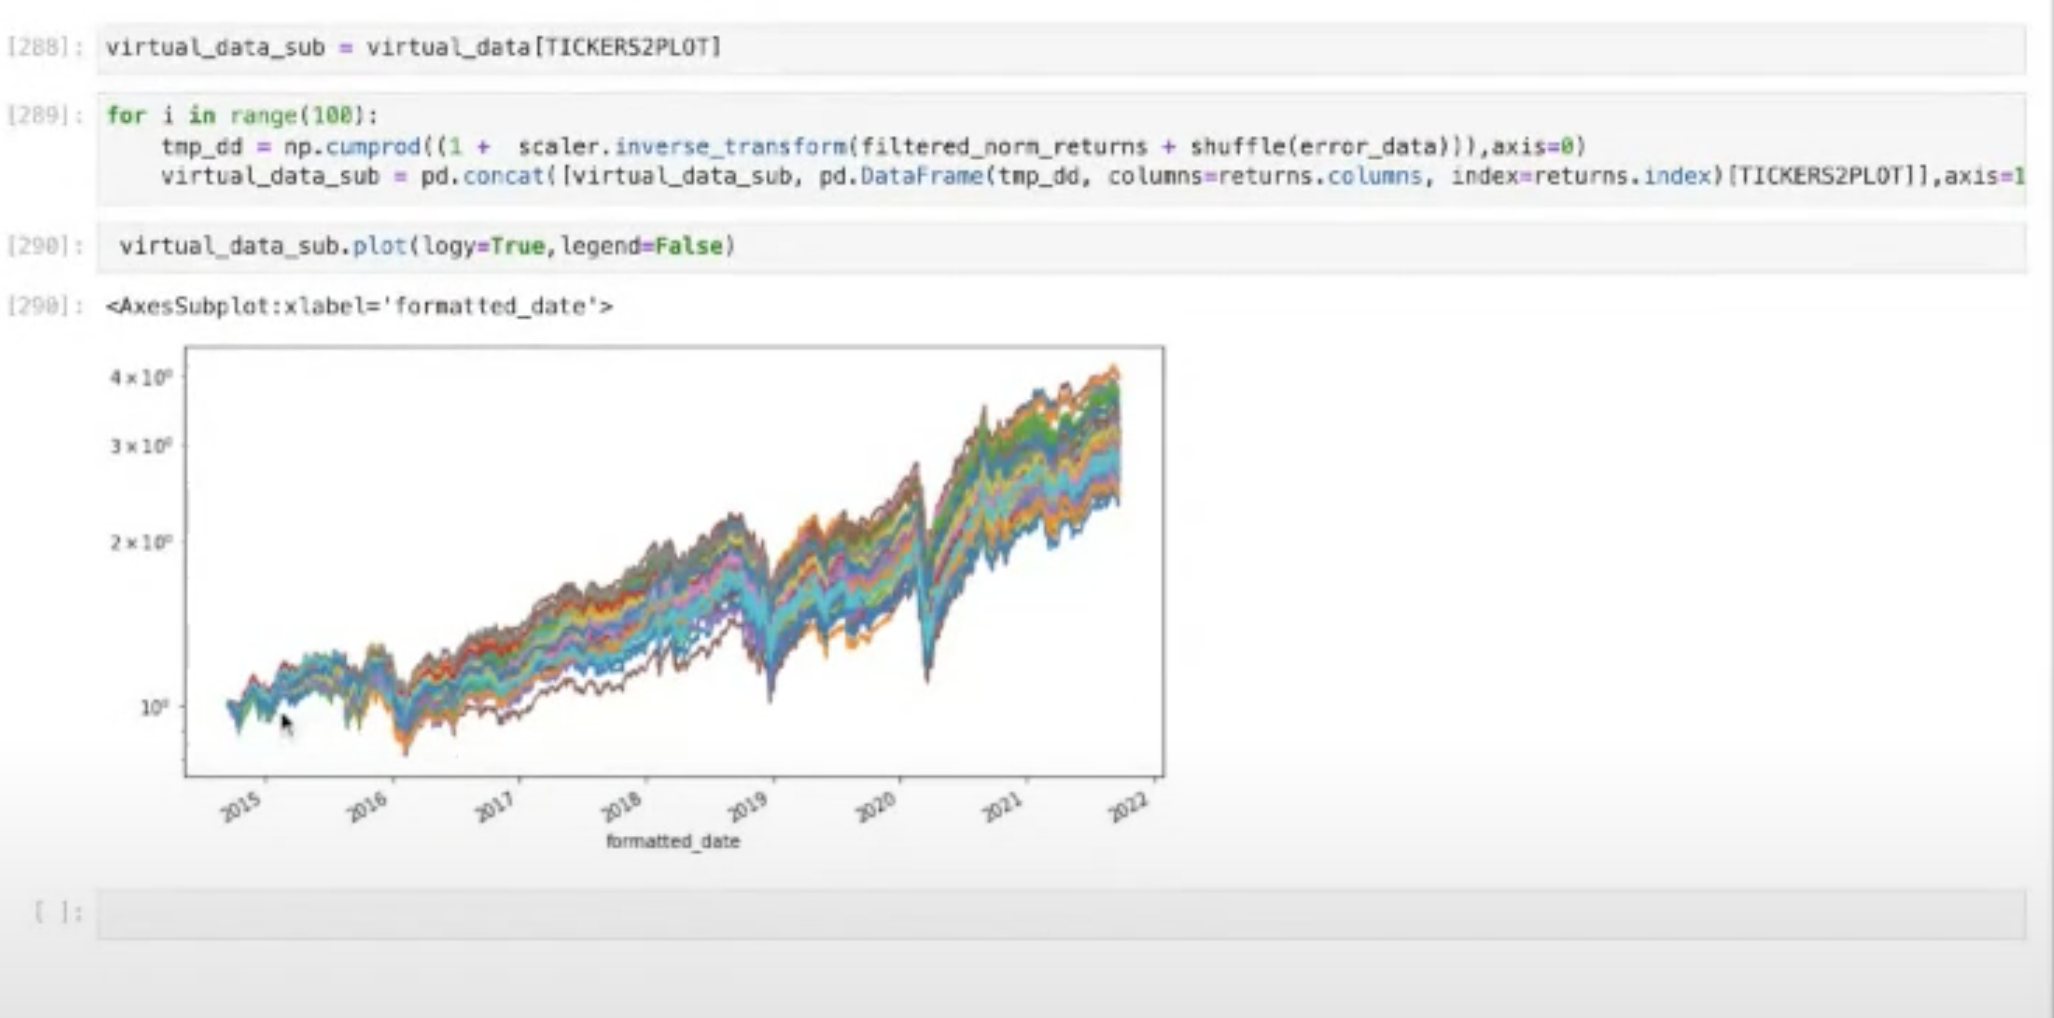